In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
import weather_routing
import pandas


In [3]:
##################
# Waypoints for the TransPac 
waypoints = pandas.DataFrame([
    (33.69853, -118.25085, 'Pt. Fermin Bouy'),
    (33.48177, -118.64101, 'Catalina West End'),
    (21.24296, -157.81775, 'Diamond Head Bouy'),
            ], columns=['lat', 'lng', 'name'])

Tracks = {
    '2024':{'Start_Date' : 20240701,# July 1st, 12:00 PST
        'Start_Time' : 20, #19:00 UTC
        'grib_files_dir' : "/Volumes/Gribs/2024"},
    '2023':{'Start_Date' : 20230701,# July 1st, 12:00 PST
        'Start_Time' : 20, #19:00 UTC
        'grib_files_dir' : "/Volumes/Gribs/2023"},
    }

In [4]:
waypoints

,lat,lng,name
0,33.69853,-118.25085,Pt. Fermin Bouy
1,33.48177,-118.64101,Catalina West End
2,21.24296,-157.81775,Diamond Head Bouy


In [5]:
route2024 = weather_routing.route_shortest_path(
    waypoints, 
    start_date=Tracks['2024']['Start_Date'], 
    start_time=Tracks['2024']['Start_Time'],
    grib_files_dir=Tracks['2024']['grib_files_dir']
)

Pt. Fermin Bouy at 2024-07-01 11:00:00-07:00
starting time: 20240701 18 2024-07-01 11:00:00-07:00
loading file: /Volumes/Gribs/2024/20240701-18-gfs.t18z.pgrb2.0p25.f000
0: twa=132.2 mag=265.4 dtg=19.9 sog=4.1
loading file: /Volumes/Gribs/2024/20240701-18-gfs.t18z.pgrb2.0p25.f001
1: twa=132.2 mag=266.4 dtg=16.6 sog=4.3
loading file: /Volumes/Gribs/2024/20240701-18-gfs.t18z.pgrb2.0p25.f002
2: twa=135 mag=260.5 dtg=14.0 sog=3.7
loading file: /Volumes/Gribs/2024/20240701-18-gfs.t18z.pgrb2.0p25.f003
3: twa=135 mag=173.7 dtg=11.1 sog=4.0
loading file: /Volumes/Gribs/2024/20240701-18-gfs.t18z.pgrb2.0p25.f004
4: twa=135 mag=257.9 dtg=8.0 sog=4.1
loading file: /Volumes/Gribs/2024/20240701-18-gfs.t18z.pgrb2.0p25.f005
5: twa=150 mag=235.5 dtg=5.4 sog=3.1
loading file: /Volumes/Gribs/2024/20240702-00-gfs.t00z.pgrb2.0p25.f000
6: twa=150 mag=178.5 dtg=2.6 sog=3.0
loading file: /Volumes/Gribs/2024/20240702-00-gfs.t00z.pgrb2.0p25.f001
7: twa=180 mag=212.4 dtg=0.6 sog=2.0
loading file: /Volumes/Gribs/2

In [6]:
route2023 = weather_routing.route_shortest_path(
    waypoints, 
    start_date=Tracks['2023']['Start_Date'], 
    start_time=Tracks['2023']['Start_Time'],
    grib_files_dir=Tracks['2023']['grib_files_dir']
)

Pt. Fermin Bouy at 2023-07-01 11:00:00-07:00
starting time: 20230701 18 2023-07-01 11:00:00-07:00
loading file: /Volumes/Gribs/2023/20230701-18-gfs.t18z.pgrb2.0p25.f000
0: twa=120 mag=200.1 dtg=20.4 sog=4.0
loading file: /Volumes/Gribs/2023/20230701-18-gfs.t18z.pgrb2.0p25.f001
1: twa=132.2 mag=210.8 dtg=17.6 sog=3.4
loading file: /Volumes/Gribs/2023/20230701-18-gfs.t18z.pgrb2.0p25.f002
2: twa=132.2 mag=213.1 dtg=15.0 sog=3.4
loading file: /Volumes/Gribs/2023/20230701-18-gfs.t18z.pgrb2.0p25.f003
3: twa=135 mag=215.6 dtg=12.8 sog=3.1
loading file: /Volumes/Gribs/2023/20230701-18-gfs.t18z.pgrb2.0p25.f004
4: twa=135 mag=303.3 dtg=10.5 sog=3.1
loading file: /Volumes/Gribs/2023/20230701-18-gfs.t18z.pgrb2.0p25.f005
5: twa=135 mag=217.6 dtg=8.4 sog=3.0
loading file: /Volumes/Gribs/2023/20230702-00-gfs.t00z.pgrb2.0p25.f000
6: twa=150 mag=239.3 dtg=6.4 sog=2.3
loading file: /Volumes/Gribs/2023/20230702-00-gfs.t00z.pgrb2.0p25.f001
7: twa=150 mag=303.1 dtg=4.4 sog=2.4
loading file: /Volumes/Gribs/

In [8]:
import pickle

In [11]:
# route2024.to_pickle('TransPac_yoy_RhumbRoute2024.pkl')

In [12]:
# route2023.to_pickle('TransPac_yoy_RhumbRoute2023.pkl')

In [7]:
import plotly.express
fig = plotly.express.line_map(route1, lat="lat", lon="lng", 
                              hover_name="date",
                              zoom=3, height=500,
                              color="red"
                             )

scatter_points = plotly.express.scatter_map(waypoints,    
                lat="lat",
                lon="lng",
                hover_name="name")
fig.add_traces(scatter_points.data)

fig.update_layout(map_style="open-street-map", map_zoom=7, 
                  map_center_lat= 26.7,
                  map_center_lon= -135,
                  margin={"r":0,"t":0,"l":0,"b":0})

fig.show()

NameError: name 'route1' is not defined

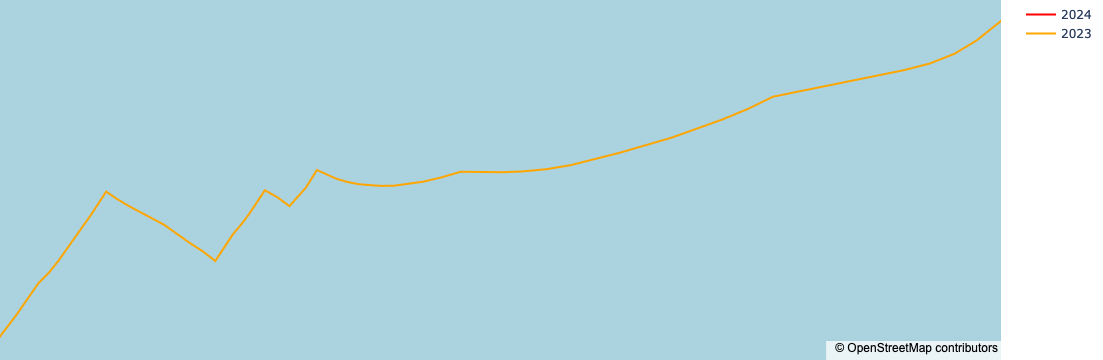

In [14]:
import plotly.graph_objects as go
import plotly.express as px

# Create the figure
fig = go.Figure()

# Add the first route (red line)
fig.add_trace(go.Scattermapbox(
    lat=route2024['lat'],
    lon=route2024['lng'],
    mode='lines',
    line=dict(color='red', width=2),
    name='2024',
    hovertext=route2024['date']
))

# Add the second route (orange line)
fig.add_trace(go.Scattermapbox(
    lat=route2023['lat'],
    lon=route2023['lng'],
    mode='lines',
    line=dict(color='orange', width=2),
    name='2023',
    hovertext=route2023['date']
))

# Add scatter points for waypoints
scatter_points = px.scatter_mapbox(waypoints, 
                                   lat="lat", 
                                   lon="lng", 
                                   hover_name="name")
fig.add_traces(scatter_points.data)

# Update layout for the map
fig.update_layout(
    mapbox_style="open-street-map",
    mapbox_zoom=7,
    mapbox_center={"lat": 26.7, "lon": -135},
    margin={"r":0, "t":0, "l":0, "b":0}
)

# Show the plot
fig.show()
